In [1]:
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
import keras.backend as K
from keras.utils import to_categorical

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/home/ekashin/.local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
gpu_options = tf.GPUOptions(allow_growth=True)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))
K.set_session(sess)

In [3]:
glob('data2/*')

['data2/train.csv',
 'data2/sample_submission.csv',
 'data2/solution.csv',
 'data2/fashin-mnist_test.csv',
 'data2/fashin-mnist_train.csv',
 'data2/fashionmnist',
 'data2/test.csv']

In [4]:
height, width = 28, 28

In [5]:
train_data = pd.read_csv('data2/train.csv')
X_train = np.array(train_data.iloc[:, 1:])
y_train = np.array(train_data.iloc[:, 0])

In [6]:
test_data = pd.read_csv('data2/test.csv')
X_test = np.array(test_data.iloc[:, :])

In [7]:
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,1,0,2,...,22,49,24,5,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,113,113,126,64,0,0,0,0,0,0
3,6,0,0,0,0,0,0,0,0,2,...,94,69,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,55,44,29,0,1,0,0,0,0,0


In [8]:
test_data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,3,...,0,0,4,153,150,38,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [9]:
X_train.shape, X_test.shape, y_train.shape

((60000, 784), (10000, 784), (60000,))

In [10]:
X_train = X_train.reshape(X_train.shape[0], height, width, 1)
X_test = X_test.reshape(X_test.shape[0], height, width, 1)

In [11]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

# Images

<Figure size 432x288 with 0 Axes>

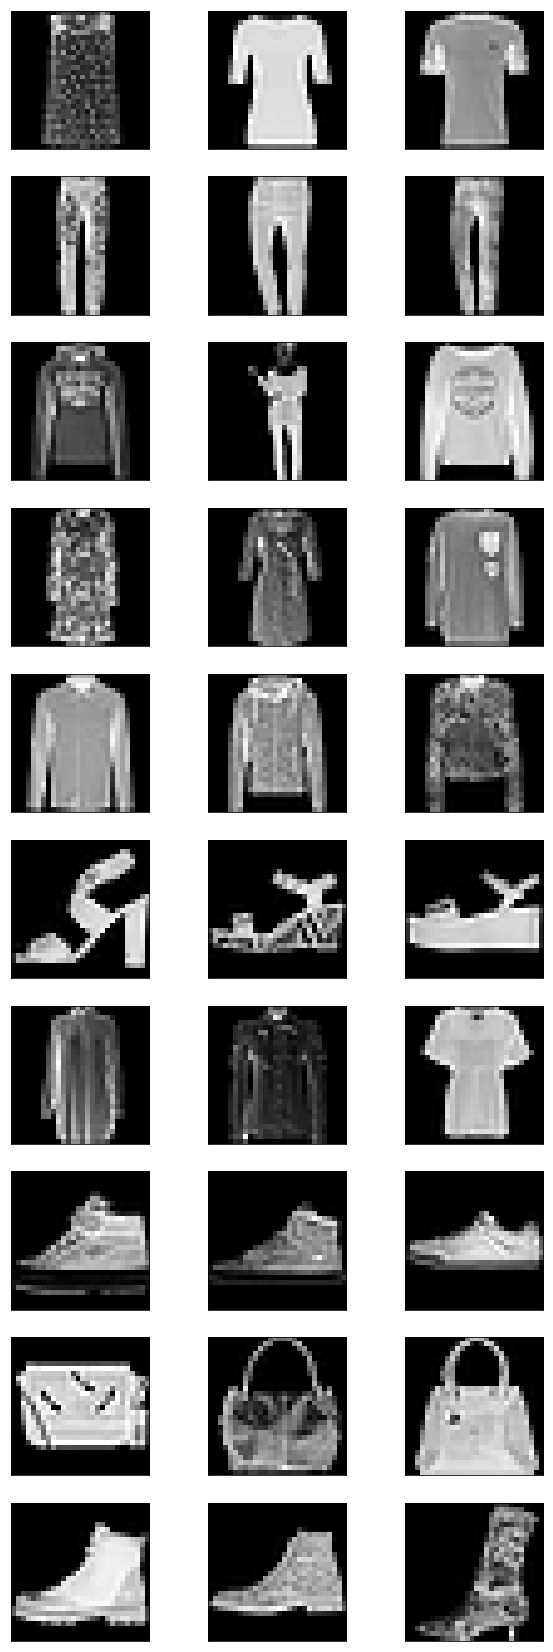

In [12]:
plt.gray()
plt.figure(figsize=(10, 30))
n_rows = 10
n_cols = 3

for i in range(10):
    X_class = X_train[y_train == i]
    for j in range(3):
        img = X_class[j, :, :, 0]
        plt.subplot(n_rows, n_cols, i * 3 + j + 1)
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])

# Model

In [13]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense

In [14]:
batch_size = 128
seed = 3243
num_classes = 10

In [15]:
X_train = X_train / 255
X_test = X_test / 255

In [16]:
y_train = to_categorical(y_train)

In [26]:
model = Sequential()
model.add(Conv2D(16, 3, activation='relu', padding='same', input_shape=(height, width, 1)))
model.add(Conv2D(16, 3, activation='relu', padding='same'))
model.add(MaxPool2D())
model.add(Conv2D(32, 3, activation='relu', padding='same'))
model.add(Conv2D(32, 3, activation='relu', padding='same'))
model.add(MaxPool2D())
model.add(Conv2D(64, 3, activation='relu', padding='same'))
model.add(Conv2D(64, 3, activation='relu', padding='same'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))

In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 16)        2320      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 7, 7, 64)          18496     
__________

In [28]:
model.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])

In [29]:
from keras.callbacks import EarlyStopping

In [30]:
hist = model.fit(X_train, y_train, validation_split=0.1, epochs=100, batch_size=batch_size,
                 callbacks=[EarlyStopping(patience=3)])

Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 8s 156us/step - loss: 0.6868 - acc: 0.7449 - val_loss: 0.3819 - val_acc: 0.8602
Epoch 2/100
54000/54000 [==============================] - 7s 127us/step - loss: 0.4032 - acc: 0.8517 - val_loss: 0.3181 - val_acc: 0.8778
Epoch 3/100
54000/54000 [==============================] - 7s 134us/step - loss: 0.3436 - acc: 0.8731 - val_loss: 0.3106 - val_acc: 0.8788
Epoch 4/100
54000/54000 [==============================] - 8s 143us/step - loss: 0.3091 - acc: 0.8856 - val_loss: 0.2693 - val_acc: 0.8970
Epoch 5/100
54000/54000 [==============================] - 8s 143us/step - loss: 0.2843 - acc: 0.8946 - val_loss: 0.2465 - val_acc: 0.9072
Epoch 6/100
54000/54000 [==============================] - 8s 143us/step - loss: 0.2625 - acc: 0.9021 - val_loss: 0.2418 - val_acc: 0.9100
Epoch 7/100
54000/54000 [==============================] - 7s 130us/step - loss: 0.2493 - acc: 0.9085 - val_loss: 0.2

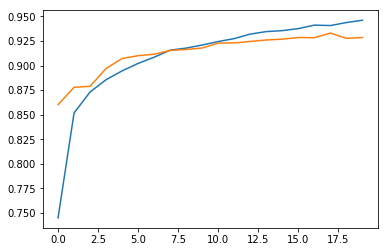

In [31]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])

# Predict

In [32]:
predict = model.predict_classes(X_test, batch_size=batch_size)

In [33]:
submission = pd.DataFrame(predict, columns=['label'], dtype=int)
submission = submission.reset_index()
submission.to_csv('data2/solution2.csv', index=False)